---
format:
  html:
    self-contained: true
---

# Lab-5.2: Random forests

**Author**: Dheeraj Oruganty

**Download**: [Click here](lab-5.2-RF.zip)

**Instructions**

* Read and work through the demonstration content on your own
* Complete all exercises below for the `R part` in a `.rmd` notebook 

**Submission:**

* You need to upload ONE document to Canvas when you are done. 
  * A PDF (or HTML) of the completed form of the R lab-assignment notebook
* The final uploaded version should NOT have any code-errors present. 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

# Demonstration

In [58]:
library('sparkline')


### Classification trees 

#### Setup

In [59]:
library(tidyverse)
library(tree)
library(ISLR)
library(caret)
library(rpart)
library(rattle)
library(visNetwork)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.3     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



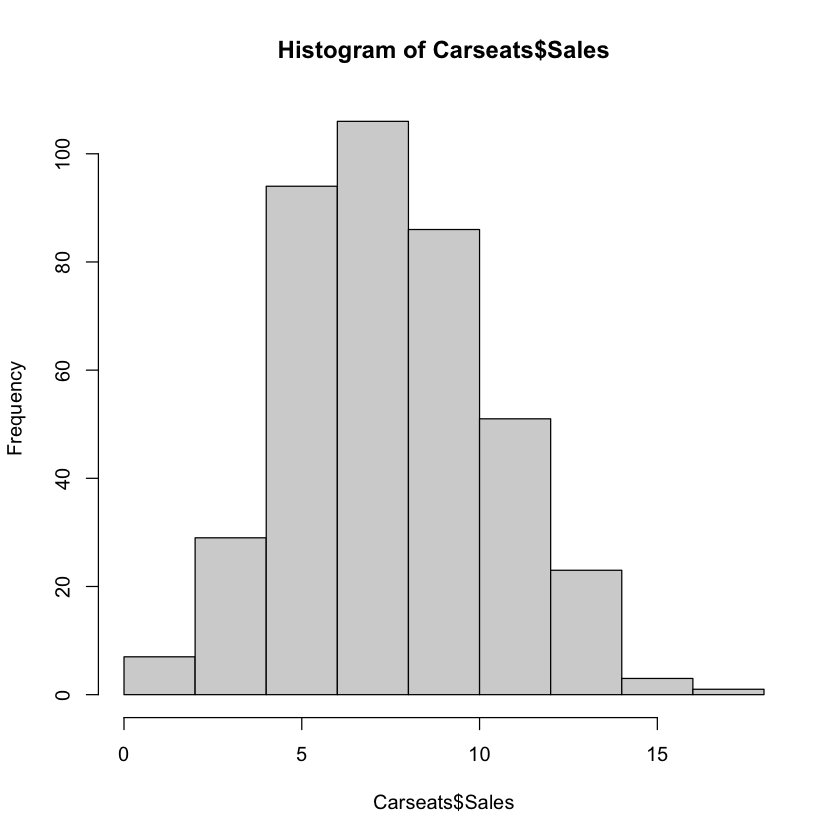

In [60]:
#attach(Carseats)
hist(Carseats$Sales)

Carseats <- Carseats %>% mutate(High = if_else(Sales <= 8, 0, 1) %>% as.factor())

#### Initial tree


Classification tree:
tree::tree(formula = High ~ ., data = Carseats %>% select(-Sales))
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

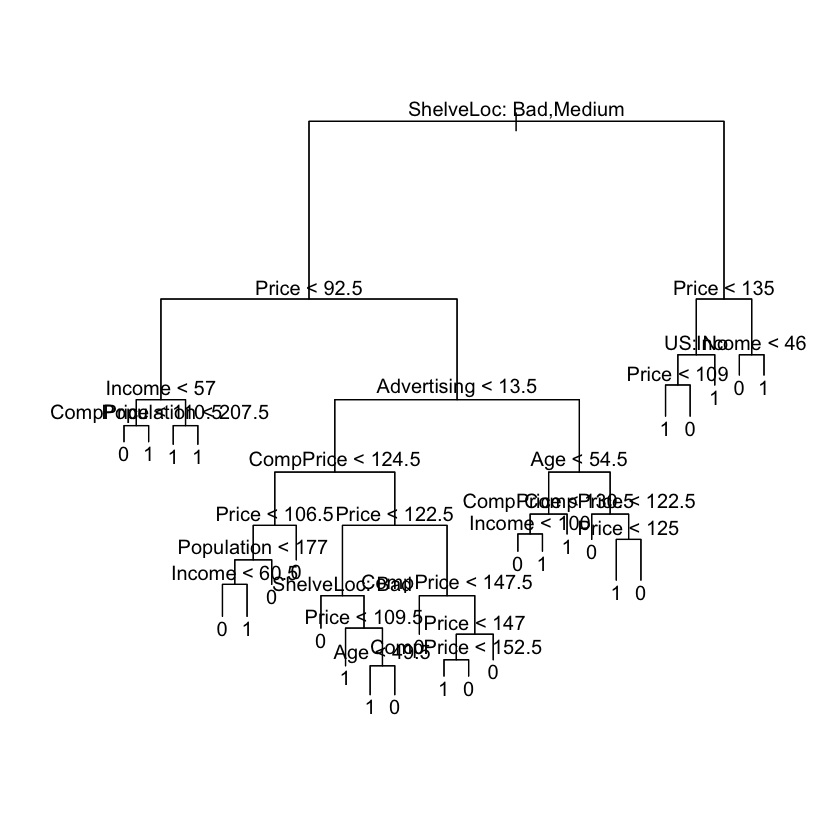

In [4]:
tree.carseats=tree::tree(High~.,data=Carseats %>% select(-Sales))

summary(tree.carseats)
plot(tree.carseats)
text(tree.carseats,pretty=0) #annotate

#### Train/test split

In [5]:
set.seed(2)
train=sample(1:nrow(Carseats), 200)
Carseats.test=Carseats[-train,]
tree.carseats=tree(High~.-Sales,Carseats,subset=train)
tree.pred=predict(tree.carseats,Carseats.test,type="class")
confusionMatrix(tree.pred,Carseats.test$High)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 104  33
         1  13  50
                                          
               Accuracy : 0.77            
                 95% CI : (0.7054, 0.8264)
    No Information Rate : 0.585           
    P-Value [Acc > NIR] : 2.938e-08       
                                          
                  Kappa : 0.5091          
                                          
 Mcnemar's Test P-Value : 0.005088        
                                          
            Sensitivity : 0.8889          
            Specificity : 0.6024          
         Pos Pred Value : 0.7591          
         Neg Pred Value : 0.7937          
             Prevalence : 0.5850          
         Detection Rate : 0.5200          
   Detection Prevalence : 0.6850          
      Balanced Accuracy : 0.7456          
                                          
       'Positive' Class : 0               
                              

#### Pruning the tree using CV

[1] "size"   "dev"    "k"      "method"

$size
[1] 21 19 14  9  8  5  3  2  1

$dev
[1] 74 76 81 81 75 77 78 85 81

$k
[1] -Inf  0.0  1.0  1.4  2.0  3.0  4.0  9.0 18.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 97 25
         1 20 58
                                          
               Accuracy : 0.775           
                 95% CI : (0.7108, 0.8309)
    No Information Rate : 0.585           
    P-Value [Acc > NIR] : 1.206e-08       
                                          
                  Kappa : 0.5325          
                                          
 Mcnemar's Test P-Value : 0.551           
                                          
            Sensitivity : 0.8291          
            Specificity : 0.6988          
         Pos Pred Value : 0.7951          
         Neg Pred Value : 0.7436          
             Prevalence : 0.5850          
         Detection Rate : 0.4850          
   Detection Prevalence : 0.6100          
      Balanced Accuracy : 0.7639          
                                          
       'Positive' Class : 0               
                                    

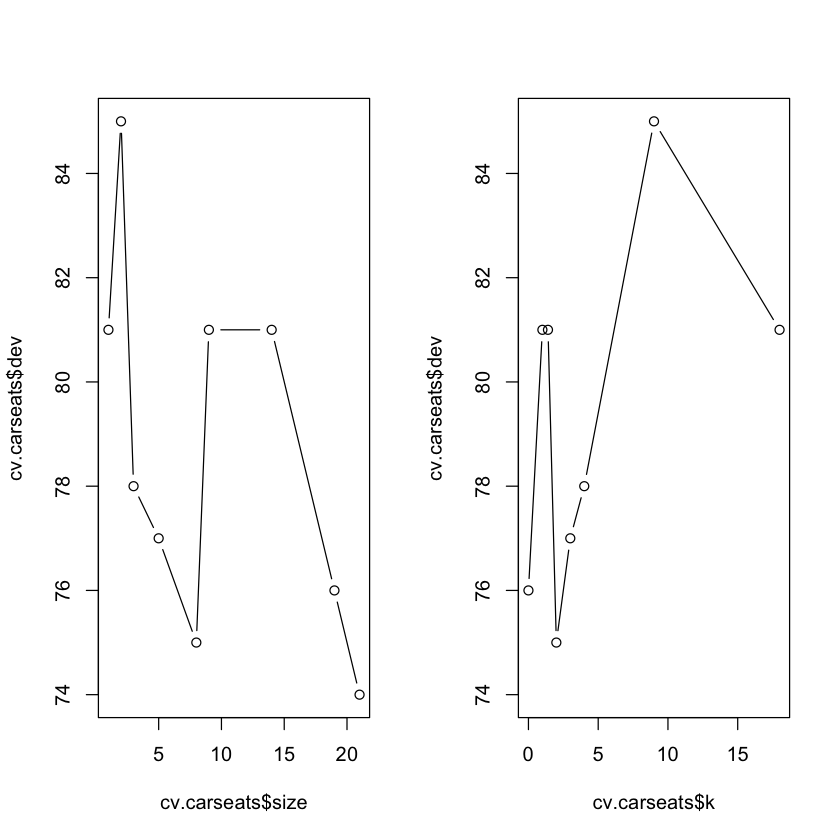

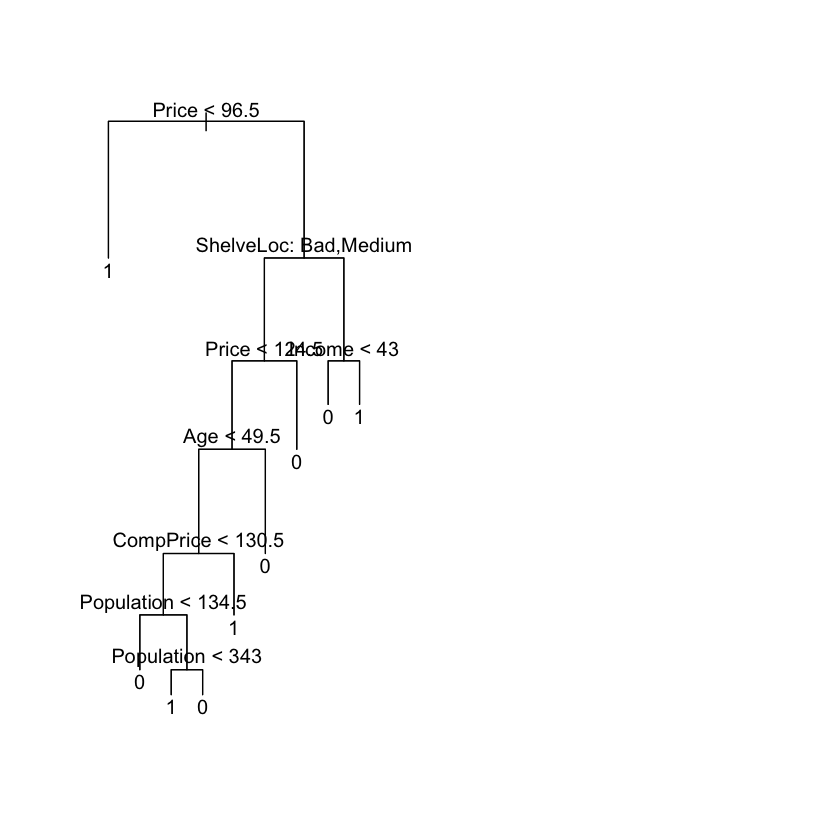

In [6]:
set.seed(3)
cv.carseats=cv.tree(tree.carseats,FUN=prune.misclass)
names(cv.carseats)
cv.carseats
par(mfrow=c(1,2))
plot(cv.carseats$size,cv.carseats$dev,type="b")
plot(cv.carseats$k,cv.carseats$dev,type="b")
prune.carseats=prune.misclass(tree.carseats,best=9)
plot(prune.carseats)
text(prune.carseats,pretty=0)
tree.pred=predict(prune.carseats,Carseats.test,type="class")
confusionMatrix(tree.pred,Carseats.test$High)

#### Pruning the tree manually

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 102  30
         1  15  53
                                          
               Accuracy : 0.775           
                 95% CI : (0.7108, 0.8309)
    No Information Rate : 0.585           
    P-Value [Acc > NIR] : 1.206e-08       
                                          
                  Kappa : 0.5241          
                                          
 Mcnemar's Test P-Value : 0.03689         
                                          
            Sensitivity : 0.8718          
            Specificity : 0.6386          
         Pos Pred Value : 0.7727          
         Neg Pred Value : 0.7794          
             Prevalence : 0.5850          
         Detection Rate : 0.5100          
   Detection Prevalence : 0.6600          
      Balanced Accuracy : 0.7552          
                                          
       'Positive' Class : 0               
                              

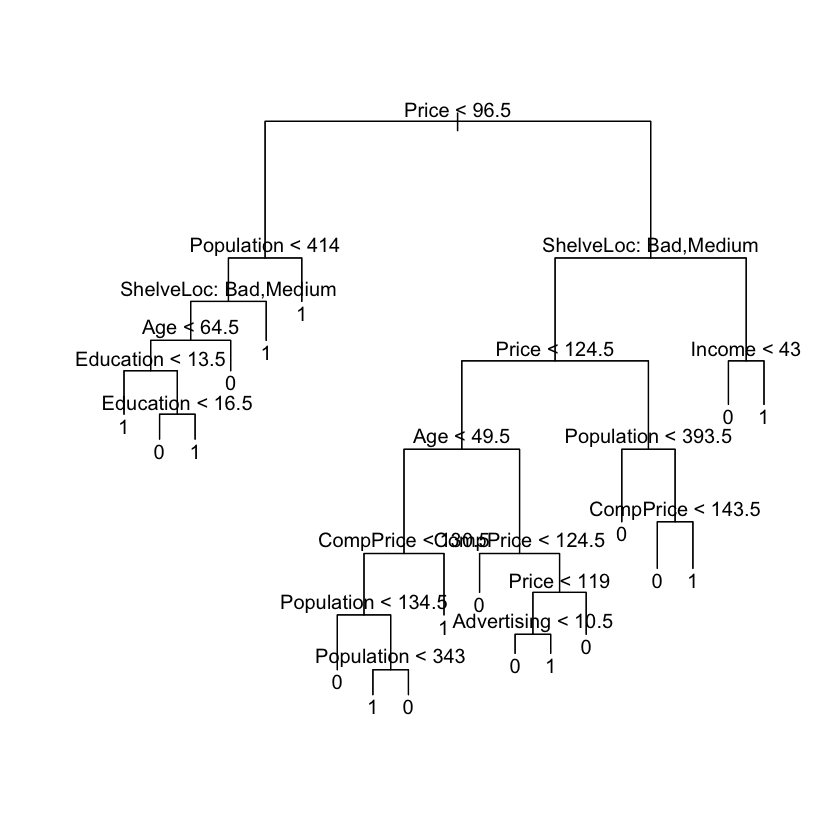

In [7]:
prune.carseats=prune.misclass(tree.carseats,best=15)
plot(prune.carseats)
text(prune.carseats,pretty=0)
tree.pred=predict(prune.carseats,Carseats.test,type="class")
confusionMatrix(tree.pred,Carseats.test$High)

### Fitting Regression Trees 

#### Initial tree - using rpart and rattle / visNetwork


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select





Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

HTML widgets cannot be represented in plain text (need html)

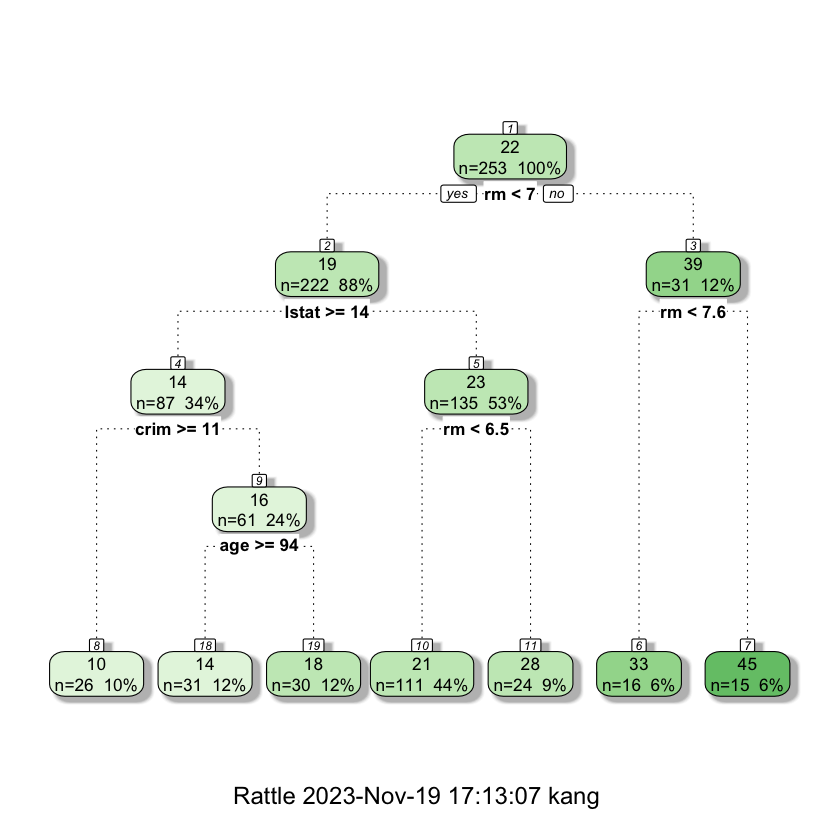

In [8]:
library(MASS)
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)
tree.boston2=rpart(medv~.,Boston,subset=train)
fancyRpartPlot(tree.boston2)
visTree(tree.boston2)

#### Pruning tree - using rpart and visNetwork

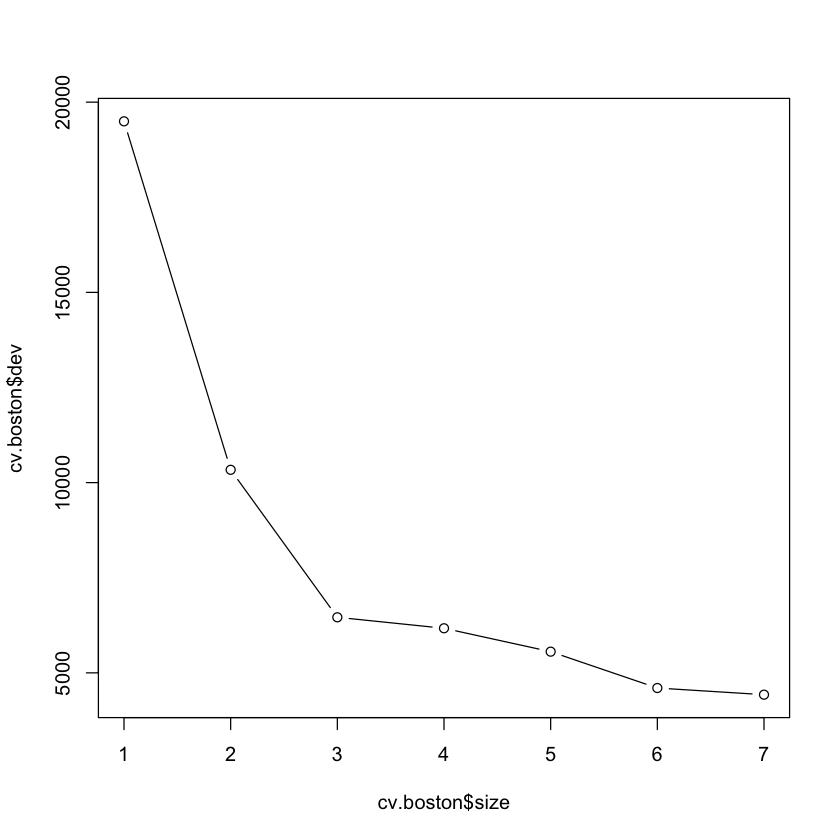

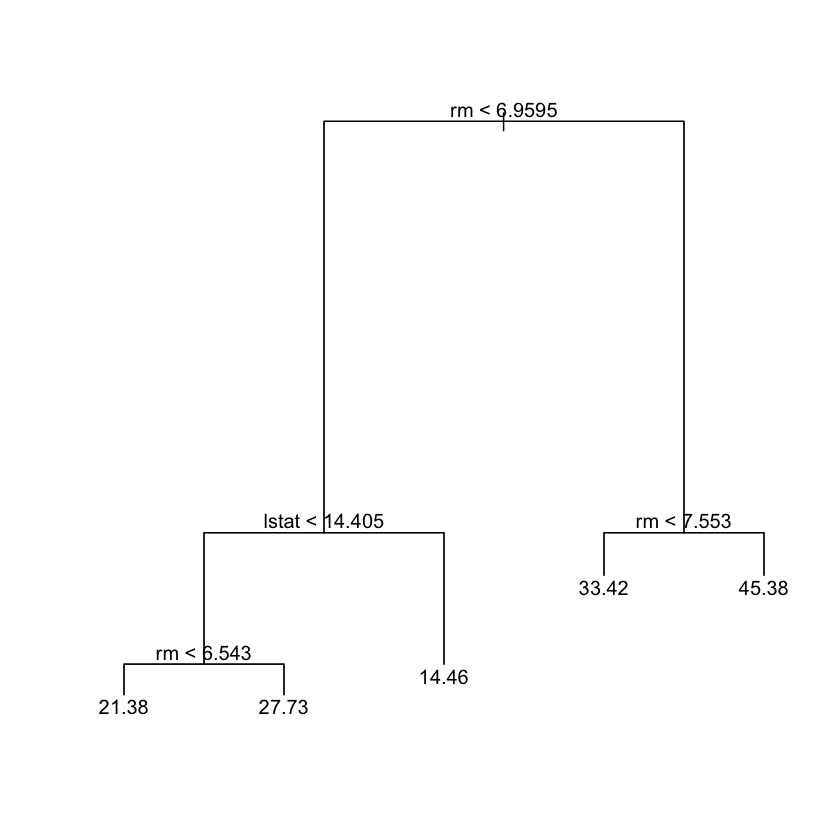

[1] 35.28688

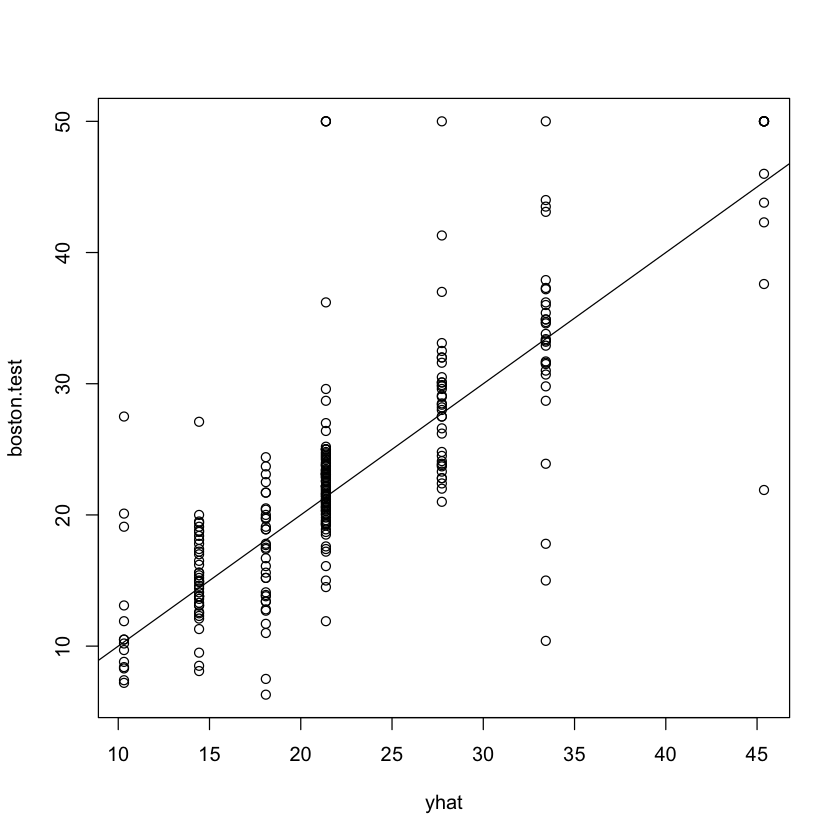

In [9]:
cv.boston=cv.tree(tree.boston)
plot(cv.boston$size,cv.boston$dev,type='b')
prune.boston=prune.tree(tree.boston,best=5)
plot(prune.boston)
text(prune.boston,pretty=0)
yhat=predict(tree.boston,newdata=Boston[-train,])
boston.test=Boston[-train,"medv"]
plot(yhat,boston.test)
abline(0,1)
mean((yhat-boston.test)^2)

### Bagging and Random Forests 

#### Bagging mtry = # variables

![](rf-meme.png)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:rattle':

    importance


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin





Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.39601
                    % Var explained: 85.17

[1] 23.59273

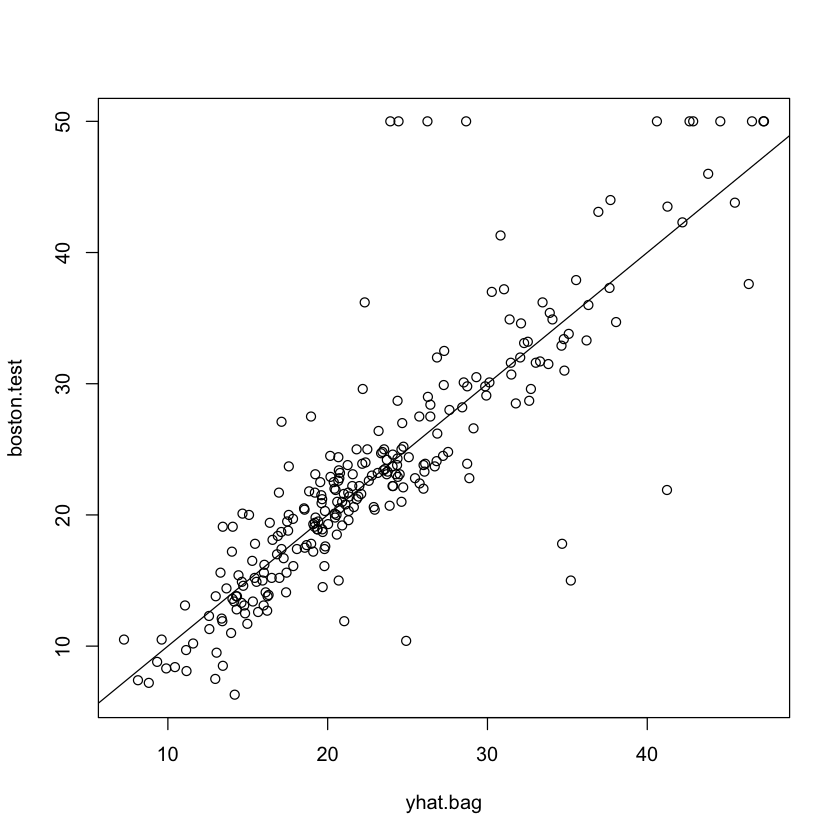

In [10]:
library(randomForest)
set.seed(1)
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,importance=TRUE)
bag.boston
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
plot(yhat.bag, boston.test)
abline(0,1)
mean((yhat.bag-boston.test)^2)

#### Adjust number of trees

In [11]:
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,ntree=25)
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
mean((yhat.bag-boston.test)^2)

[1] 23.66716

#### Random forest mtry < # variables

[1] 19.62021

,%IncMSE,IncNodePurity
crim,16.697017,1076.08786
zn,3.625784,88.35342
indus,4.968621,609.53356
chas,1.061432,52.21793
nox,13.518179,709.87339
rm,32.343305,7857.65451
age,13.272498,612.21424
dis,9.032477,714.94674
rad,2.878434,95.80598
tax,9.118801,364.92479


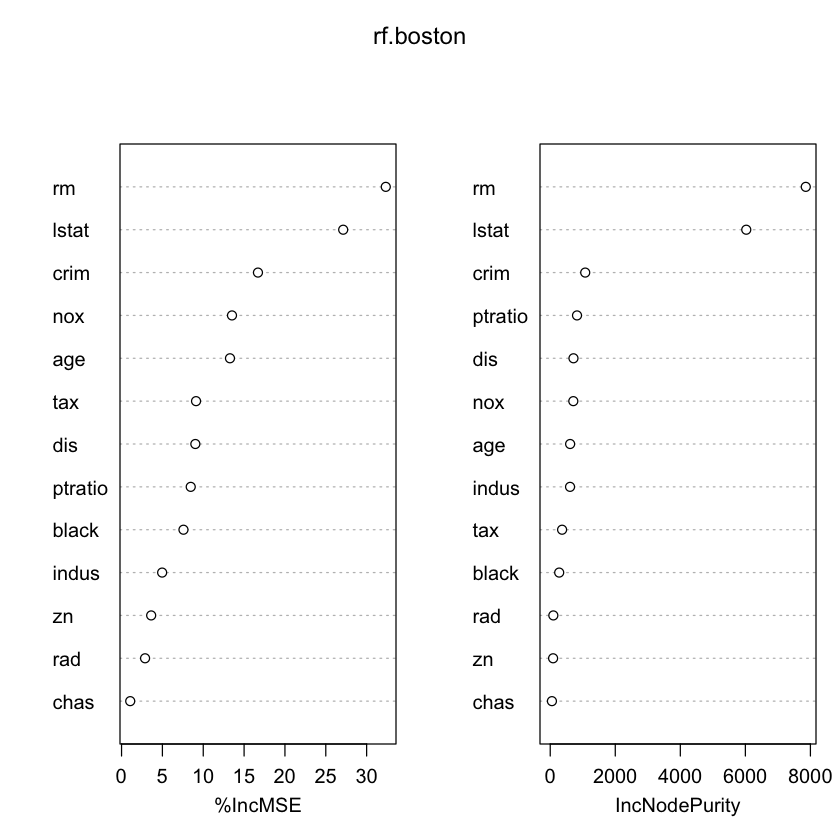

In [12]:
set.seed(1)
rf.boston=randomForest(medv~.,data=Boston,subset=train,mtry=6,importance=TRUE)
yhat.rf = predict(rf.boston,newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)
importance(rf.boston)
varImpPlot(rf.boston)

### Boosting

Loaded gbm 2.1.8.1



,var,rel.inf
,<chr>,<dbl>
rm,rm,43.9919329
lstat,lstat,33.1216941
crim,crim,4.2604167
dis,dis,4.0111090
nox,nox,3.4353017
black,black,2.8267554
age,age,2.6113938
ptratio,ptratio,2.5403035
tax,tax,1.4565654


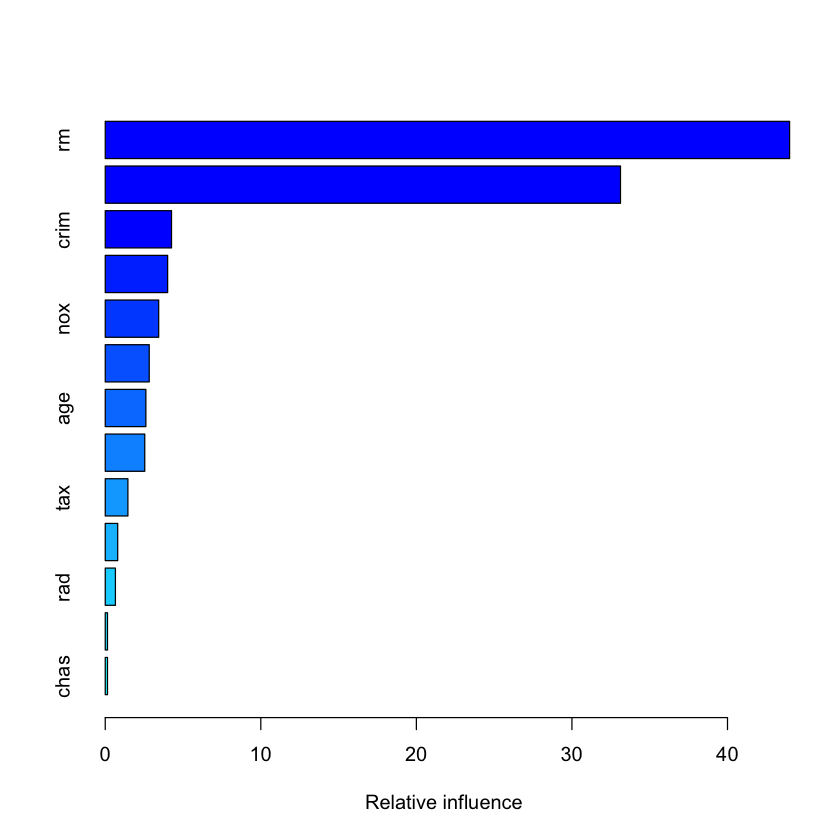

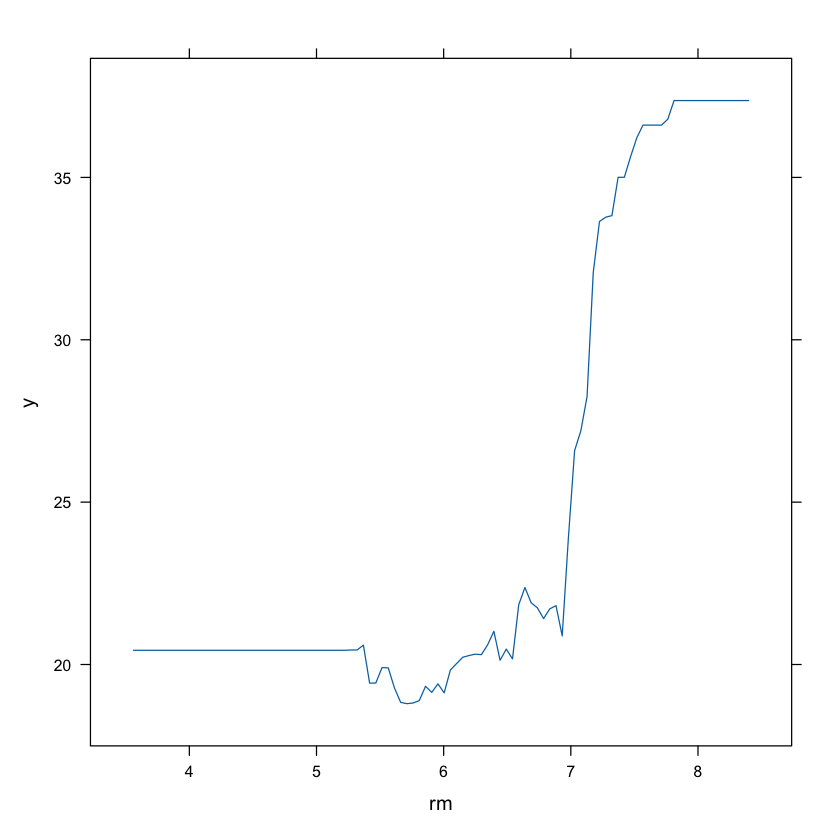

[1] 18.84709

[1] 18.33455

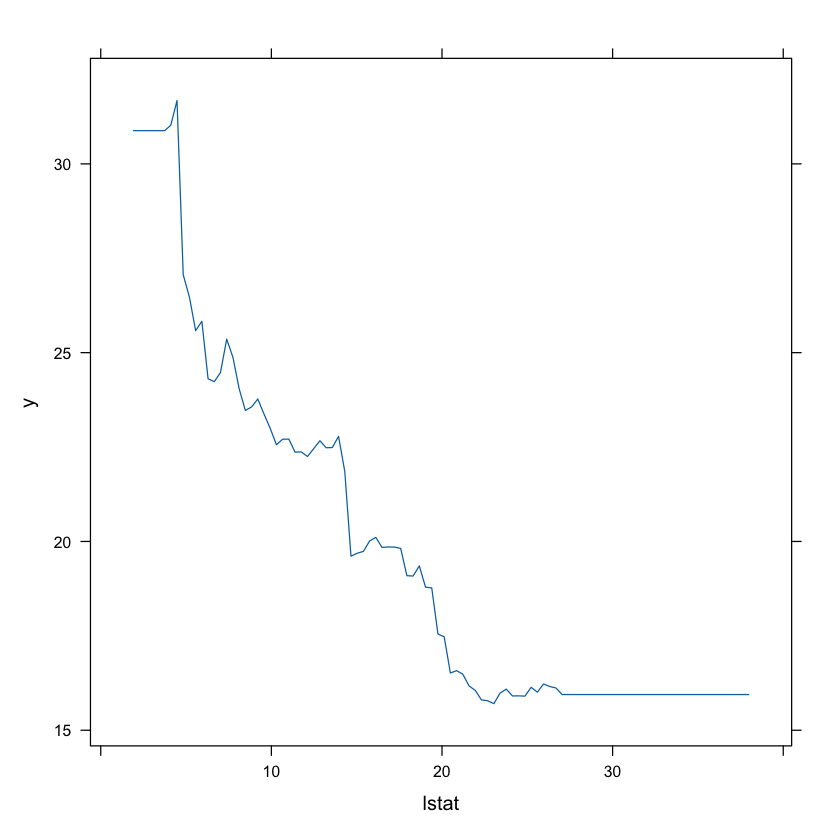

In [13]:
library(gbm)
set.seed(1)
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4)
summary(boost.boston)
par(mfrow=c(1,2))
plot(boost.boston,i="rm")
plot(boost.boston,i="lstat")
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)
boost.boston=gbm(medv~.,data=Boston[train,],distribution="gaussian",n.trees=5000,interaction.depth=4,shrinkage=0.2,verbose=F)
yhat.boost=predict(boost.boston,newdata=Boston[-train,],n.trees=5000)
mean((yhat.boost-boston.test)^2)


# Lab Assignment

### Problem 1: 

Implement decision tree from scratch

a) _Warm up_. Write a function called rss() that takes in a vector and returns the residual sum of squares (relative to the mean of the vector).

In [4]:
rss <- function(vec) {
    return(sum(sapply(vec, function(x) (x - mean(vec))^2)))
}

b) _Best Split_. We're next going to write a function best_split() that will form the basis of a decision tree. This function will take in two arguments: a vector predictor variable (ie, x) and a vector target variable (ie, y). This function will identify the single location in the x domain that would yield the best split of the data, such that the two halves now each have least total RSS in the target variable. 


Some things to think about:
 (i) If your input x vector has *n* data points, how many possible split locations are there? 
 (ii) You can accomplish this task by brute force. For every possible split location, split the data into two parts and compute the new total RSS. Then just return whichever split location was the optimal one. 
 
Make sure your function returns a few things (perhaps in a list): the location of the x split, the mean of y for each of the split parts, the improvement in RSS that was achieved by the split. 

In [52]:
bestsplit <- function(x, y) {
  n <- length(x)
  best_split <- NULL
  best_total_rss <- Inf
  best_means <- NULL
  improvement <- 0
  initial_rss <- rss(y)
  for (i in 1:(n - 1)) {
    left_indices <- 1:i
    right_indices <- (i + 1):n

    left_mean <- mean(y[left_indices])
    right_mean <- mean(y[right_indices])

    left_rss <- rss(y[left_indices])
    right_rss <- rss(y[right_indices])
    total_rss <- left_rss + right_rss
    if (total_rss < best_total_rss) {
      best_total_rss <- total_rss
      best_split <- i
      best_means <- c(left_mean, right_mean)
      improvement <- initial_rss - total_rss
    }
  }

  return(list(split = best_split, means = best_means, improvement = improvement, total_rss = best_total_rss))
}


c) _One Dimensional Data_ Here is a synthetic data set with one predictor and one response. Use your function to find out where the first split would be if $y$ is predicted from $x$ with a regression tree.

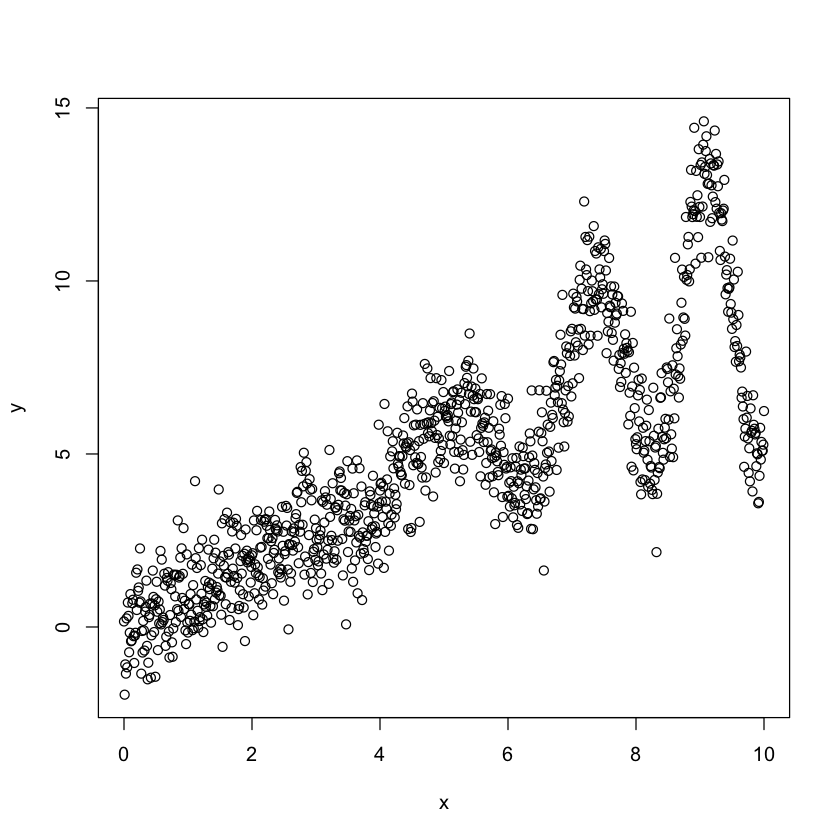

In [53]:
x = seq(0,10,by = .01)
y0 = cos(x/4 + x^2/5)*x^2/20 + x 
y = y0 + rnorm(length(x))
mydf = data.frame(x=x,y=y)
rss0 = 1000*var(y)
plot(x,y)
split0 <- bestsplit(x,y)

What is the total RSS of y? What this RSS reduced to when you split the data? 



In [67]:
print("Split point index: ")
split0[1]
print("Split point value:")
y[split0$split]
if (split0[3] > 0)
    print("RSS is now:")
    print(split0[4])
    print("RSS is reduced by:")
    print(split0[3])

[1] "Split point index: "


$split
[1] 427

[1] "Split point value:"


[1] 3.553061

[1] "RSS is now:"
$total_rss
[1] 4985.961

[1] "RSS is reduced by:"
$improvement
[1] 6420.291



d) _Growing the Tree_ 
Split the lower half again. Split the upper half again. What is the total RSS now?



In [57]:
split1_left <- bestsplit(x[1:split0$split],y[1:split0$split])
split1_right <- bestsplit(x[split0$split:length(split0$split)],y[split0$split:length(split0$split)])
total_rss <- split1_left$total_rss + split1_right$total_rss
total_rss

[1] 1026.465

e) Try this all again with the same data but with R's tree() function. Make a plot of the tree. Do the first few splits agree with the results of your method?




Regression tree:
tree(formula = x ~ ., data = mydf)
Number of terminal nodes:  5 
Residual mean deviance:  2.109 = 2101 / 996 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.3080 -0.9963 -0.2344  0.0000  0.8756  5.3360 

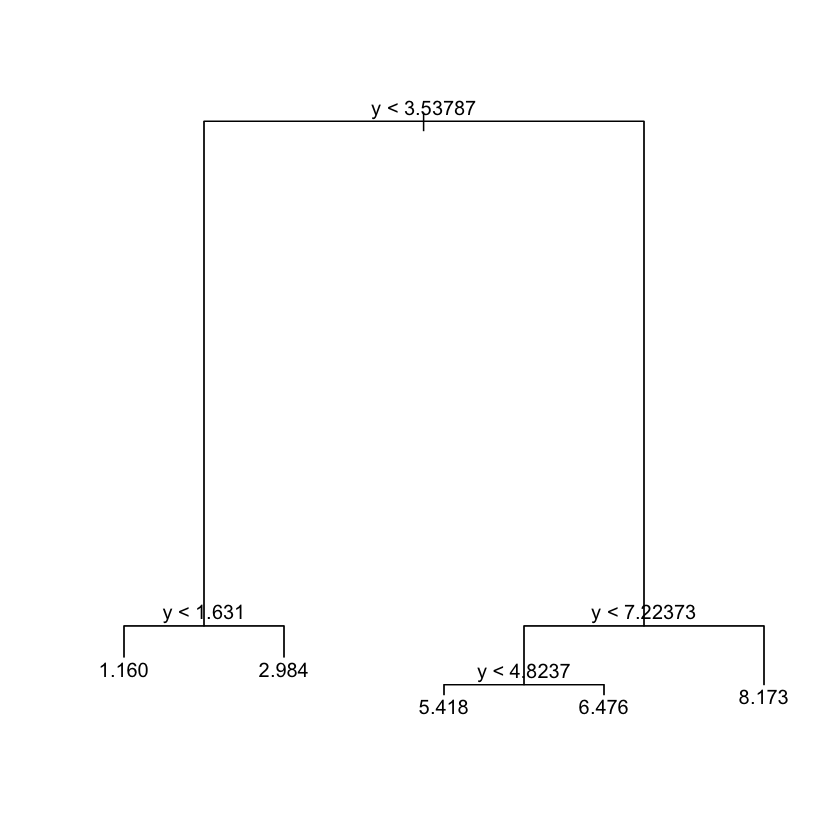

In [69]:
tree.mydf = tree(x~.,data=mydf,)

summary(tree.mydf)
plot(tree.mydf)
text(tree.mydf,pretty=0)

f) Now that we have a good understanding of how to do recursive binary splitting of a single variable, how do would you handle multiple predictors? 



By adding an extra loop to loop over the multiple predictors, taking best RSS score as the best predictor.

### Problem 2: 

**Complete one of two problems on abalone shells or airfoil data**

Your group will be assigned one of the following problems to go over during lab. You will walkthrough your results at the end of class

#### 2a

_Work with Abalone Data_. These data may be found on the [UC Irvine website](http://archive.ics.uci.edu/ml/). They give various physical characteristics of about 4000 abalone shellfish. The data were collected in Tasmania in 1995. Make sure that the data are in your source directory.

a) We'll try to predict the number of Rings, using the other features. Train a linear model as a baseline case. What is the RSS or Rsquared?

b) Now build a tree and plot it.  We can make the annotation of the tree look better by reducing the font size with the \texttt{cex} parameter. What is the depth of the tree? How many leaves does it have?

c) We can manually prune the tree to whatever depth we want. Use the function prune.tree() to simplify the tree so it only has 4 leaves. Visualize this tree.

d) Which two continuous predictors seem to be highly predictive according to the tree? Draw a sketch of the feature space and the splits in the space, as well as the predicted number of Rings for each region.

e) Decision trees have high variance. Split the Abalone data in half and train two trees (and don't worry about any extra pruning). Observe the differences between them, visualize the two different trees.



In [71]:
load("abalone.RData")
summary(abalone)

 Sex          Length         Diameter          Height        WholeWeight    
 F:1307   Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 I:1342   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 M:1528   Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
          Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
          3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
          Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
 ShuckedWeight    VisceraWeight     ShellWeight         Rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   : 9.934  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.00

In [73]:
head(abalone)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


##### a)

In [75]:
model <- lm(Rings ~ ., data = abalone)
residuals_squared <- resid(model)^2
rss <- sum(residuals_squared)
rss

[1] 20060.73

##### b)


Regression tree:
tree(formula = Rings ~ ., data = abalone)
Variables actually used in tree construction:
[1] "ShellWeight"   "Sex"           "ShuckedWeight"
Number of terminal nodes:  10 
Residual mean deviance:  5.443 = 22680 / 4167 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.8820 -1.5540 -0.5536  0.0000  0.9490 17.3000 

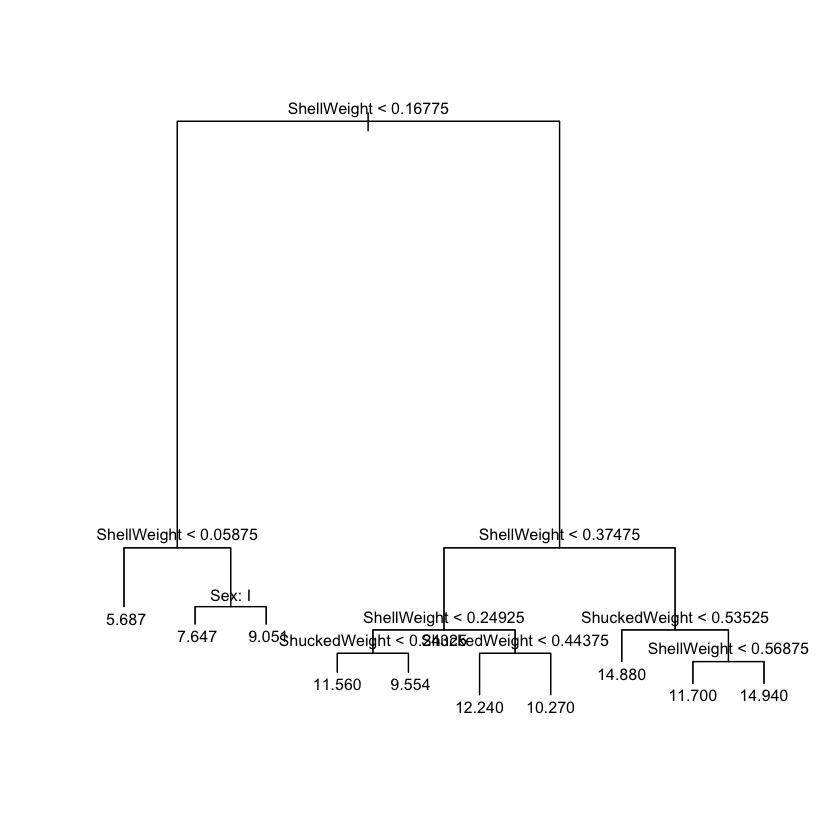

In [82]:
tree.abalone=tree(Rings ~ ., data = abalone)

summary(tree.abalone)
plot(tree.abalone)
par(cex = 0.8)
text(tree.abalone,pretty=0)

It has 10 leaves, 5 depth

##### c)

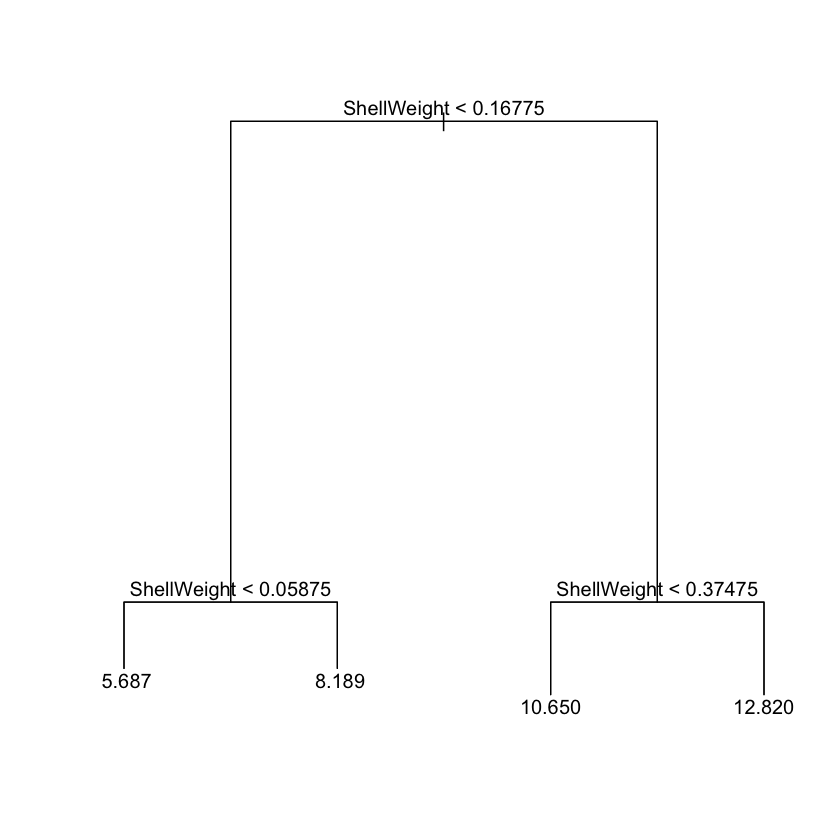

In [86]:
prune.abalone = prune.tree(tree.abalone, best=4)
plot(prune.abalone)
text(prune.abalone,pretty=0)

##### d)


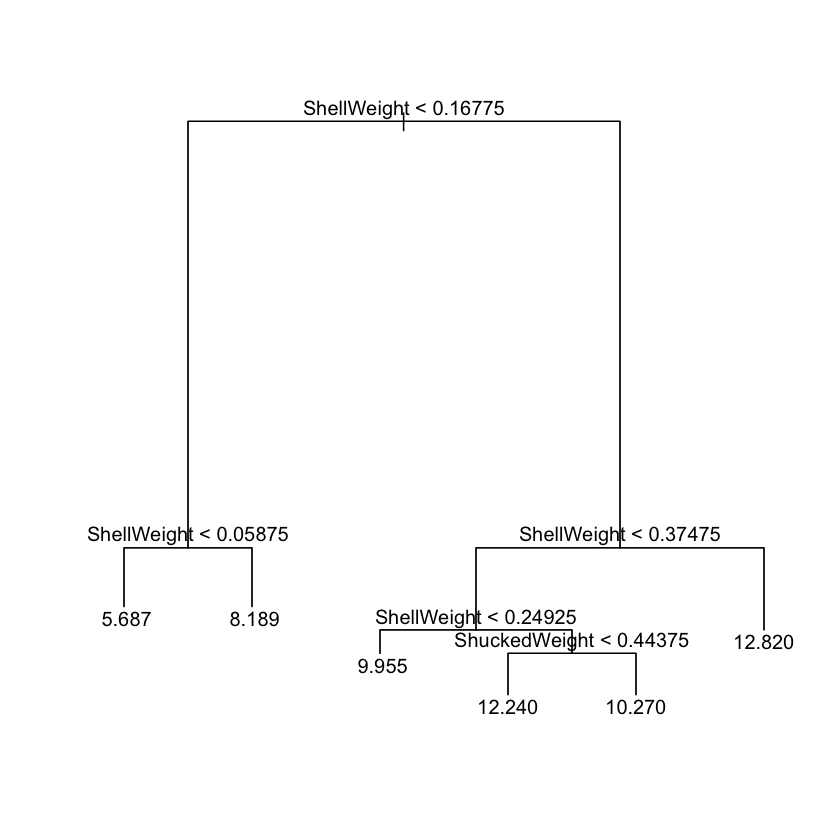

In [101]:
prune.abalone = prune.tree(tree.abalone, best=5)
plot(prune.abalone)
text(prune.abalone,pretty=0)

`ShellWeight` and `ShuckedWeight`. Sketch of the feature space and the splits in the space, as well as the predicted number of Rings for each region is shown above.

##### e)

In [95]:
# Randomly subsetting the dataframe by rows
set.seed(123)

row_indices <- sample(1:nrow(abalone))

half_point <- ceiling(nrow(abalone) / 2)
first_half_indices <- row_indices[1:half_point]
second_half_indices <- row_indices[(half_point + 1):nrow(abalone)]

abalone.1 <- abalone[first_half_indices, ]
abalone.2 <- abalone[second_half_indices, ]


Regression tree:
tree(formula = Rings ~ ., data = abalone.1)
Variables actually used in tree construction:
[1] "ShellWeight"   "Diameter"      "ShuckedWeight"
Number of terminal nodes:  11 
Residual mean deviance:  5.276 = 10960 / 2078 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-7.7780 -1.3380 -0.3375  0.0000  0.7237 17.4100 

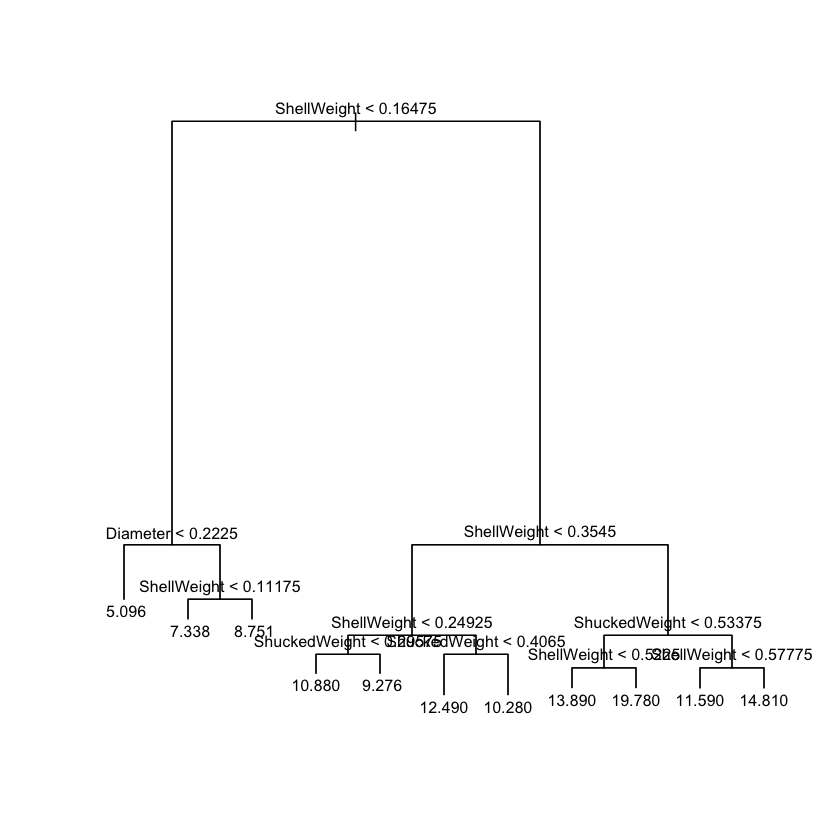

In [99]:
tree.abalone.1=tree(Rings ~ ., data = abalone.1)

summary(tree.abalone.1)
plot(tree.abalone.1)
par(cex = 0.8)
text(tree.abalone.1,pretty=0)


Regression tree:
tree(formula = Rings ~ ., data = abalone.2)
Variables actually used in tree construction:
[1] "ShellWeight"   "Sex"           "ShuckedWeight" "WholeWeight"  
Number of terminal nodes:  12 
Residual mean deviance:  4.944 = 10260 / 2076 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.1270 -1.3800 -0.3128  0.0000  0.7167 10.6200 

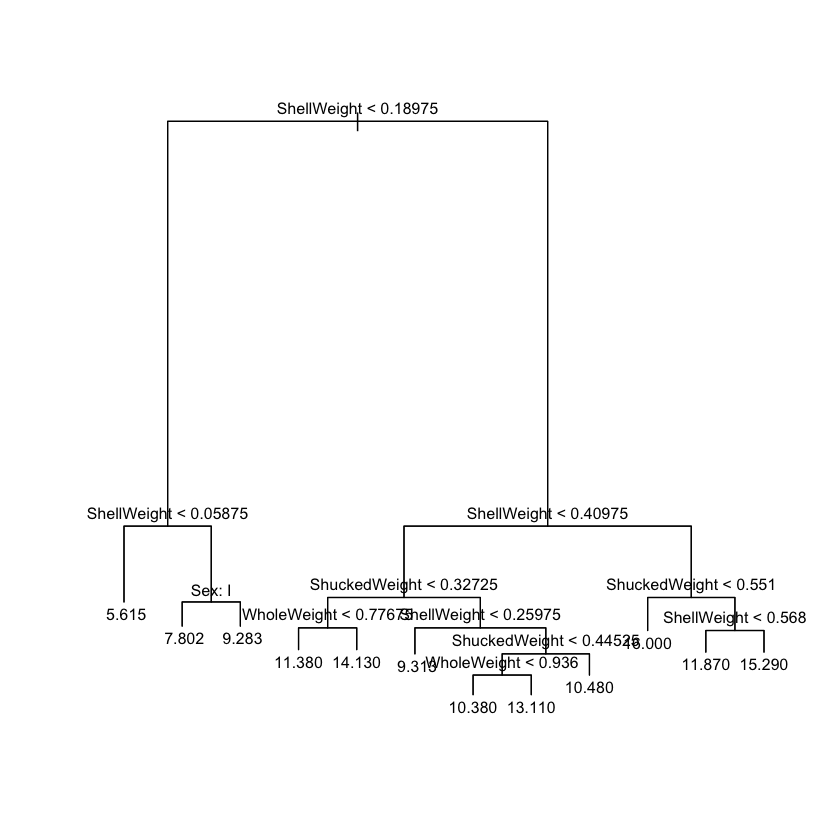

In [100]:
tree.abalone.2=tree(Rings ~ ., data = abalone.2)

summary(tree.abalone.2)
plot(tree.abalone.2)
par(cex = 0.8)
text(tree.abalone.2,pretty=0)

The abalone.2 has more depth than the first one, and the first split point between two trees has shifted grately.

#### 2b

Let's explore the airfoil data. We're going to try to predict the "Pressure" feature from the other features. Use one of the tree aggregation methods we have learned about (Random Forest, Boosting, Bagging)

(a) Start with some exploratory visualizations to see how the other features are related to Pressure. Feel free to use pairs(), or scatterplots, or boxplots. Do any features seem to be strongly predictive of Pressure?

(b) Create a train-test split of the data.

(c) Fit a linear model, observe the $R^2$ on the test set.

(d) Fit a single decision tree, one with large depth. Observe the $R^2$ on the test set. Make a plot of three if you wish.

(e) Fit a tree aggregation model, observe the $R^2$ on the test set.
